In [25]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

#Loading the Data

df_csv = pd.read_csv('../raw_data/salaries.csv')

with open('../raw_data/salary.json') as f:
    json_data = json.load(f)

df_json = pd.DataFrame(json_data)

#  structure and missing values

print(df_csv.info())
print()
# Displaying the first 5 rows
print(df_csv.head())
print()
print("Missing")
print(df_csv.isna().sum())
print()
print(df_json.info())
print()
print(df_json.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  int64 
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary              141566 non-null  int64 
 5   salary_currency     141566 non-null  object
 6   salary_in_usd       141566 non-null  int64 
 7   employee_residence  141566 non-null  object
 8   remote_ratio        141566 non-null  int64 
 9   company_location    141566 non-null  object
 10  company_size        141566 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.9+ MB
None

   work_year experience_level employment_type             job_title  salary  \
0       2025               EN              FT  Data Quality Analyst   60000   
1       2025               EN        

In [26]:
# Add company_name column from df_json to df_csv
df_csv['company_name'] = df_json['company_name']

print(df_csv.head())
print(df_csv.info())

   work_year experience_level employment_type             job_title  salary  \
0       2025               EN              FT  Data Quality Analyst   60000   
1       2025               EN              FT  Data Quality Analyst   48000   
2       2025               SE              FT     Applied Scientist  266000   
3       2025               SE              FT     Applied Scientist  204000   
4       2025               SE              FT        Data Scientist  291000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             GBP          75949                 GB             0   
1             GBP          60759                 GB             0   
2             USD         266000                 US             0   
3             USD         204000                 US             0   
4             USD         291000                 US             0   

  company_location company_size    company_name  
0               GB            M          OpenAI  
1         

Since, both the datasets have same number of rows and same core columns, I am simply gonna add company_name column from df_json to df_csv.

In [27]:
df_json.to_csv('../output/cleaned_salaries.csv', index=False)

In [28]:
df = pd.read_csv('../output/cleaned_salaries.csv')

In [29]:
# Dataset Structure
print("Shape:", df.shape)
print("\nUnique job titles:", df['job_title'].nunique())
print("Unique experience levels:", df['experience_level'].unique())
print("Unique employment types:", df['employment_type'].unique())
print("Unique company sizes:", df['company_size'].unique())
print("Unique remote_ratio values:", df['remote_ratio'].unique())

Shape: (141566, 12)

Unique job titles: 410
Unique experience levels: ['EN' 'SE' 'MI' 'EX']
Unique employment types: ['FT' 'CT' 'PT' 'FL']
Unique company sizes: ['M' 'L' 'S']
Unique remote_ratio values: [  0 100  50]


In [30]:
# Checking for duplicates
print("Number of duplicates:", df_json.duplicated().sum()) # There were 22017 duplicates originally

print()
print(df.isna().sum()) # Missing Values

Number of duplicates: 22017

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
company_name          0
dtype: int64


In [31]:
# Finding duplicate rows
duplicates_mask = df.duplicated(keep=False)

# Filtering duplicates only
duplicate_rows = df[duplicates_mask]

# Printing first 10 duplicate rows to inspect
print(duplicate_rows.head(10))

# Checking how many times each duplicate appears:
print(duplicate_rows.groupby(duplicate_rows.columns.tolist()).size().reset_index(name='count').sort_values('count', ascending=False).head(10))

    work_year experience_level employment_type          job_title  salary  \
5        2025               SE              FT     Data Scientist  197000   
10       2025               SE              FT     Data Scientist  235400   
12       2025               SE              FT     Data Scientist  244000   
13       2025               SE              FT     Data Scientist  166000   
15       2025               SE              FT     Data Scientist  166000   
19       2025               SE              FT     Data Scientist  183000   
21       2025               SE              FT     Data Scientist  156000   
24       2025               SE              FT     Data Scientist  258000   
30       2025               SE              FT  Software Engineer  202000   
31       2025               SE              FT  Software Engineer  141000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
5              USD         197000                 US             0   
10          

In [32]:
df_cleaned = df.drop_duplicates()
print("New shape after dropping duplicates:", df_cleaned.shape)

New shape after dropping duplicates: (119549, 12)


In [33]:
# Making a clean .csv file
df_cleaned.to_csv('../output/cleaned_salaries.csv', index=False)

In [34]:
# Count rows where salary or salary_in_usd is zero
print("Number of zero salaries:", (df_cleaned['salary'] == 0).sum())
print("Number of zero salaries in USD:", (df_cleaned['salary_in_usd'] == 0).sum())


Number of zero salaries: 0
Number of zero salaries in USD: 0


In [35]:
# statistical summary
print(df_cleaned['salary_in_usd'].describe())

count    119549.000000
mean     156073.319049
std       75775.260157
min       15000.000000
25%      102000.000000
50%      144300.000000
75%      196900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64


In [36]:
# What are the unique job titles in the dataset?
unique_job_titles = df_cleaned['job_title'].unique()
print(f"Number of unique job titles: {len(unique_job_titles)}")
print("Some job titles:", unique_job_titles[:10]) 

Number of unique job titles: 410
Some job titles: ['Data Quality Analyst' 'Applied Scientist' 'Data Scientist' 'Manager'
 'Software Engineer' 'Machine Learning Engineer'
 'Machine Learning Scientist' 'Analyst' 'Power BI Developer' 'Engineer']


In [37]:
# Which companies are offering the highest average salaries
avg_salary_by_company = df_cleaned.groupby('company_name')['salary_in_usd'].mean().sort_values(ascending=False)
print("Companies offering the highest avg salries: ")
print()
print(avg_salary_by_company.head(10))

Companies offering the highest avg salries: 

company_name
Salesforce AI        157138.204475
Microsoft AI         157018.333083
IBM Watson           156605.819980
DeepMind             156551.050156
Google DeepMind      156516.436980
OpenAI               156479.720415
Apple ML Research    156360.577010
Tesla Autonomy       156215.180569
NVIDIA AI            156149.183686
Amazon AI Labs       155954.058618
Name: salary_in_usd, dtype: float64


In [38]:
# What is the average salary for each job title
avg_salary_by_job = df_cleaned.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
print("Average salary of each job title: ")
print()
print(avg_salary_by_job.head(10))  # Printing the top 10

Average salary of each job title: 

job_title
Research Team Lead                450000.0000
Analytics Engineering Manager     399880.0000
Data Science Tech Lead            375000.0000
Applied AI ML Lead                292500.0000
IT Enterprise Data Architect      284090.0000
Head of Applied AI                273875.0000
Director of Data                  270000.0000
Head of Machine Learning          267456.8125
Director of Product Management    264784.2000
AIRS Solutions Specialist         263250.0000
Name: salary_in_usd, dtype: float64


In [41]:
# How many jobs are listed per location?
jobs_per_location = df_cleaned.groupby('company_location').size().sort_values(ascending=False)
print(jobs_per_location.head(10)) # top 10

company_location
US    105322
CA      5501
GB      3758
AU       543
NL       421
DE       408
FR       385
LT       348
AT       309
ES       264
dtype: int64


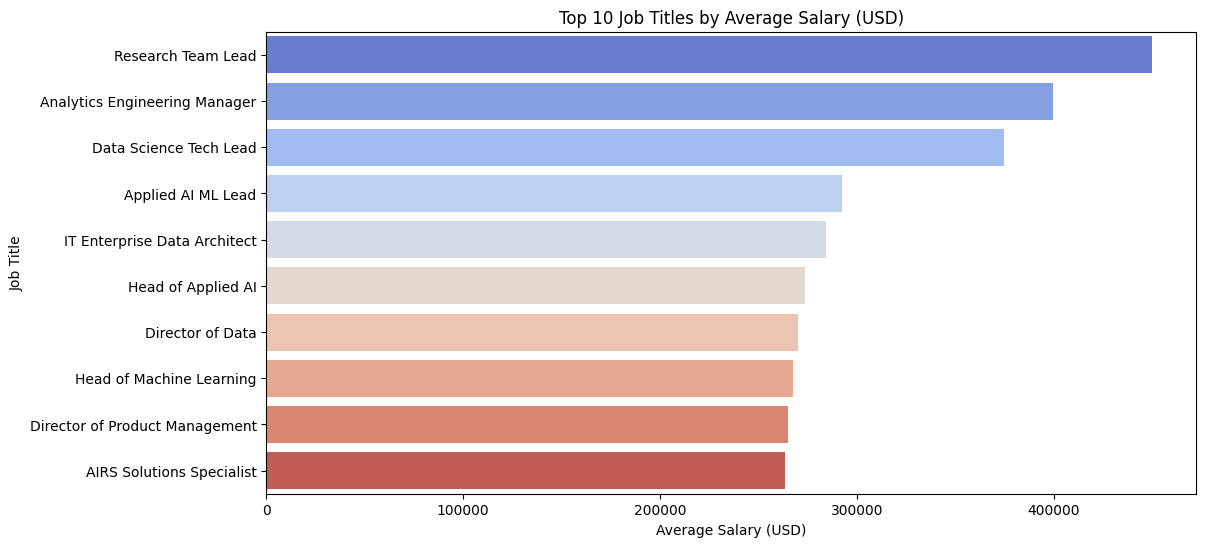

In [42]:
# Bar Plot - Average Salary by Job Title
# Top 10 job titles by average salary
top_jobs = df_cleaned.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, hue=top_jobs.index, palette='coolwarm', dodge=False, legend=False)
plt.title('Top 10 Job Titles by Average Salary (USD)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

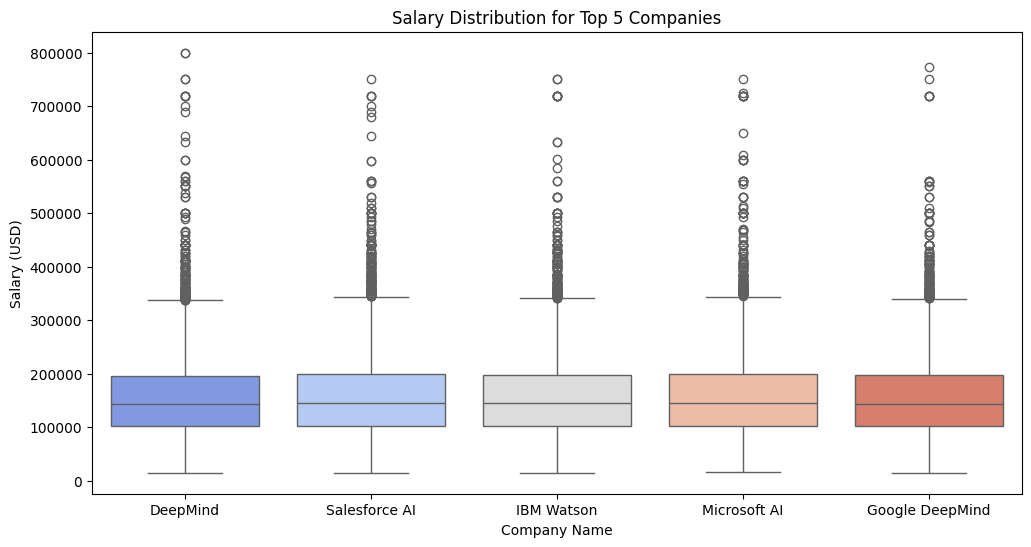

In [41]:
# Box Plot - Salary Distribution for Top 5 Companies
# Top 5 companies by average salary
top_companies = df_cleaned.groupby('company_name')['salary_in_usd'].mean().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned[df_cleaned['company_name'].isin(top_companies)],
            x='company_name',
            y='salary_in_usd',
            hue='company_name',
            palette='coolwarm',
            dodge=False,
            legend=False)

plt.title('Salary Distribution for Top 5 Companies')
plt.xlabel('Company Name')
plt.ylabel('Salary (USD)')
plt.show()

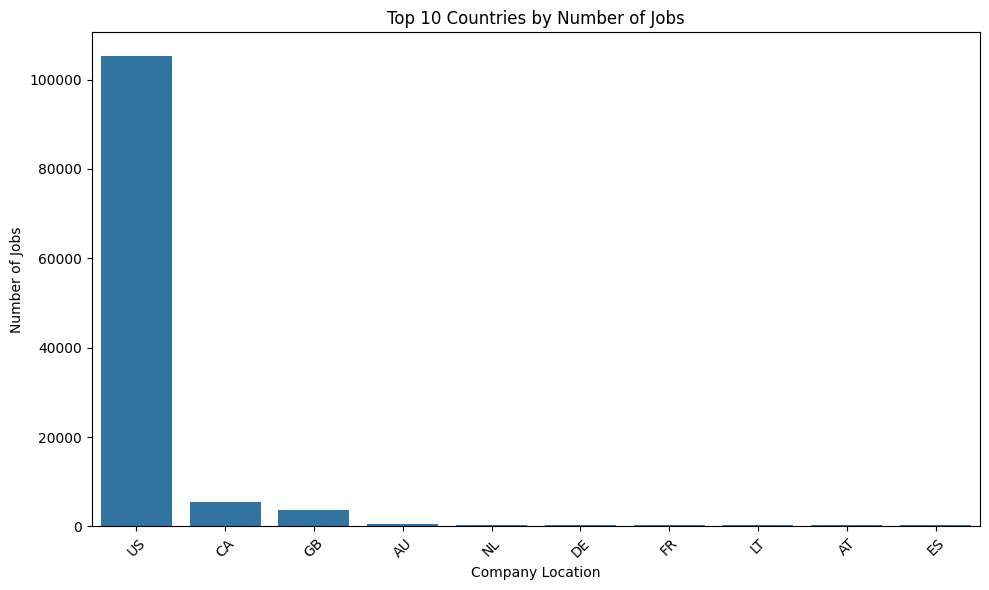

In [43]:
# Count Plot - Number of Jobs per Location
top_locations = df_cleaned['company_location'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned[df_cleaned['company_location'].isin(top_locations)],
              x='company_location',
              order=top_locations)
plt.title('Top 10 Countries by Number of Jobs')
plt.xlabel('Company Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


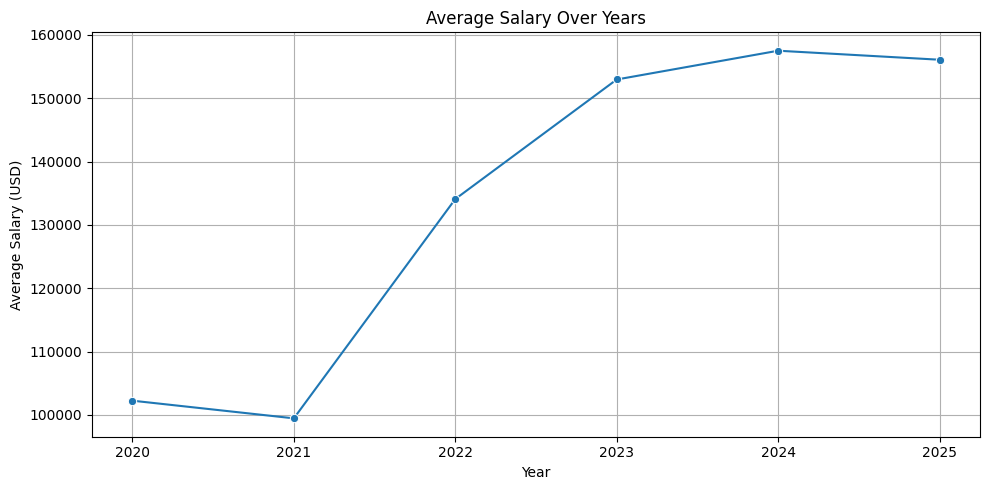

In [40]:
# Line Plot - Salary Trends over Years
if 'work_year' in df_cleaned.columns:
    plt.figure(figsize=(10, 5))
    year_salary = df_cleaned.groupby('work_year')['salary_in_usd'].mean()
    sns.lineplot(x=year_salary.index, y=year_salary.values, marker='o')
    plt.title('Average Salary Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Salary (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

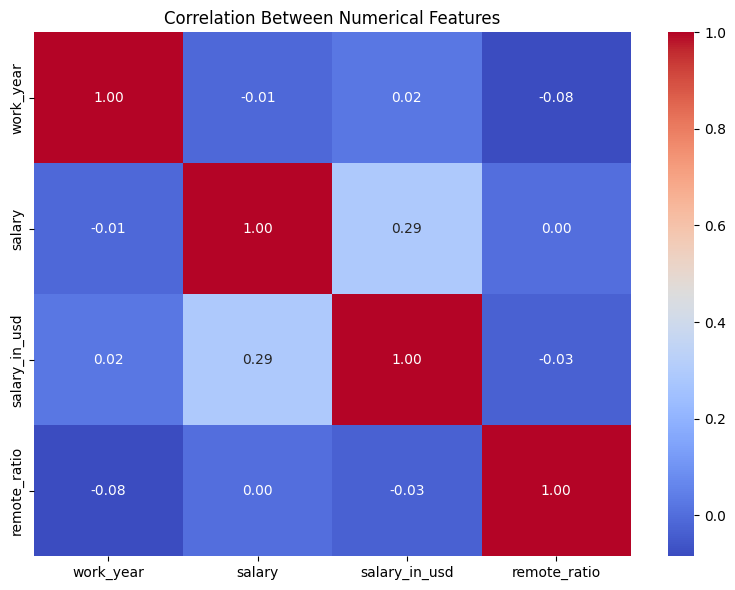

In [39]:
# Heatmap - Correlation between numerical features
plt.figure(figsize=(8, 6))
numerical_data = df_cleaned.select_dtypes(include=['int64', 'float64'])
corr = numerical_data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()

**Insights and Summary**

1. Research Team Lead and Analytics Engineering Manager have the highest average salaries, indicating the premium placed on leadership and technical specialization roles.

2. DeepMind shows the widest salary distribution among the top 5 companies, suggesting a broad range of roles from entry-level to senior, leading to high variation in salaries.

3. The United States (US) dominates the job market with over 100,000 listings, far surpassing countries like Canada (CA) and Great Britain (GB). This highlights a strong concentration of AI/ML job opportunities in the US.

4. The yearly salary trend shows a dip during 2020–2021, likely due to pandemic impacts, followed by a steady recovery and growth through 2025, reflecting a resilient and expanding job market.

5. The correlation heatmap indicates generally weak relationships between numerical features. A few extreme correlation values (e.g., -1.0) may suggest data quality issues or outliers worth further investigation.